Требуется изучить базу данных и проанализировать спрос на рейсы в города, проводящие крупные фестивали.

# Содержание проекта
1. [Аналитика](#analitika)

    1.1. [Датасет 1](#d1)
    
    1.2. [Выводы по датасету 1](#d1v)
    
    1.3. [Датасет 2](#d2)
    
    1.4. [Выводы по датасету 2, график 1](#d2v1)
    
    1.5. [Выводы по датасету 2, график 2](#d2v2)


2. [Проверка гипотезы](#gipoteza)

    2.1. [Выводы по пункту 2.](#v2)
    

3. [Общие выводы](#vyvody)

# 1. Аналитика <a id='analitika'></a>
Дано два набора данных:
- **query_1.csv** (модель самолета и количество рейсов для каждой модели в сентябре 2018 года)
- **query_3.csv** (город и среднее количество рейсов, прибывающих в город за день в сентябре 2018 года)

Для этих двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

In [1]:
# импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# грузим датасеты

data_model_flights = pd.read_csv('/datasets/query_1.csv') #1
data_city_avgflights = pd.read_csv('/datasets/query_3.csv') #2
data_ticket_festival = pd.read_csv('/datasets/query_last.csv') #3

## Датасет 1 <a id='d1'></a>

In [3]:
# изучаем данные датасета 1 (модели самолетов и количество рейсов в сентябре 2018)
data_model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
data_model_flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
#пасажировместимость моделей - даные из Интернета
#Airbus A319-100 - 116-156 чел. (среднемагистральный)
#Airbus A321-200 - 170-220 чел. (среднемагистральный)
#Boeing 737-300 - 128-149 чел. (среднемагистральный)
#Boeing 767-300 - 218-350 чел. (средне- и дальнемагистральный)
#Boeing 777-300 - 368-451 (550) чел. (дальнемагистральный)
#Bombardier CRJ-200 - 50 чел. (ближнемагистральный)
#Cessna 208 Caravan - 9-13 чел. (ближнемагистральный)
#Sukhoi SuperJet-100 - 98 чел. (ближнемагистральный)

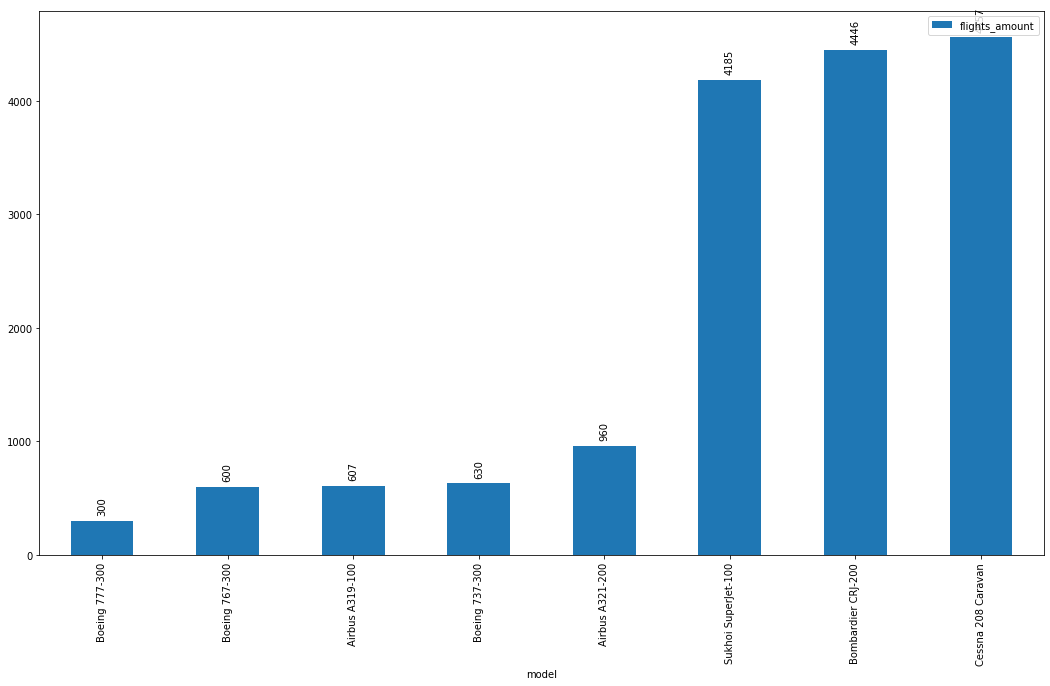

In [6]:
# график зависимости между количеством мест и количеством рейсов
ax = data_model_flights.sort_values(by='flights_amount',ascending=True).plot(x='model', y='flights_amount',kind='bar',figsize=(18, 10))
rects = ax.patches
labels = data_model_flights.sort_values(by='flights_amount',ascending=True)['flights_amount']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 50, label,
            ha='center', va='bottom',rotation='vertical')

## Выводы по датасету 1 <a id='d1v'></a>
Судя по данным, на авиалиниях используются три вида самолетов:
- **Ближнемагистральные**: Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100.  
  Летают на короткие расстояния, обладают небольшой пассажировместимостью (менее 100),совершают за месяц много рейсов (более 4000)
  
  
- **Среднемагистральные**: Airbus A319-100, Airbus A321-200, Boeing 737-300, Boeing 767-300.
  Используются на средних расстояниях, пассажировместимость от 116 до 350 мест, совершают в среднем 600 рейсов в месяц.
  
  Здесь по количеству полетов выбивается Airbus A321-200 (> 900 полетов в месяц), это связано с тем, что конструкция этого самолета позволяет использовать его не только на средних, но и на малых дистанциях.
  
  
- **Дальнемагистральные**: Boeing 777-300	
  
  Летает на длинные расстояния, обладает большой пассажировместимостью (до 550 мест), соответственно делает мало рейсов (300 в месяц).

## Датасет 2 <a id='d2'></a>


In [7]:
# изучаем данные 2 датасета
data_city_avgflights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
data_city_avgflights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [9]:
# город и среднее количество рейсов, прибывающих в город за день в сентябре 2018.
data_city_avgflights

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [10]:
#округлим среднее значение количества рейсов до целого и поменяем тип average_flights с float на int
data_city_avgflights['average_flights'] = data_city_avgflights['average_flights'].round(0).astype('int64')
data_city_avgflights

,city,average_flights
0,Абакан,4
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2
...,...,...
96,Чита,2
97,Элиста,5
98,Южно-Сахалинск,4
99,Якутск,3


In [11]:
data_city_avgflights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


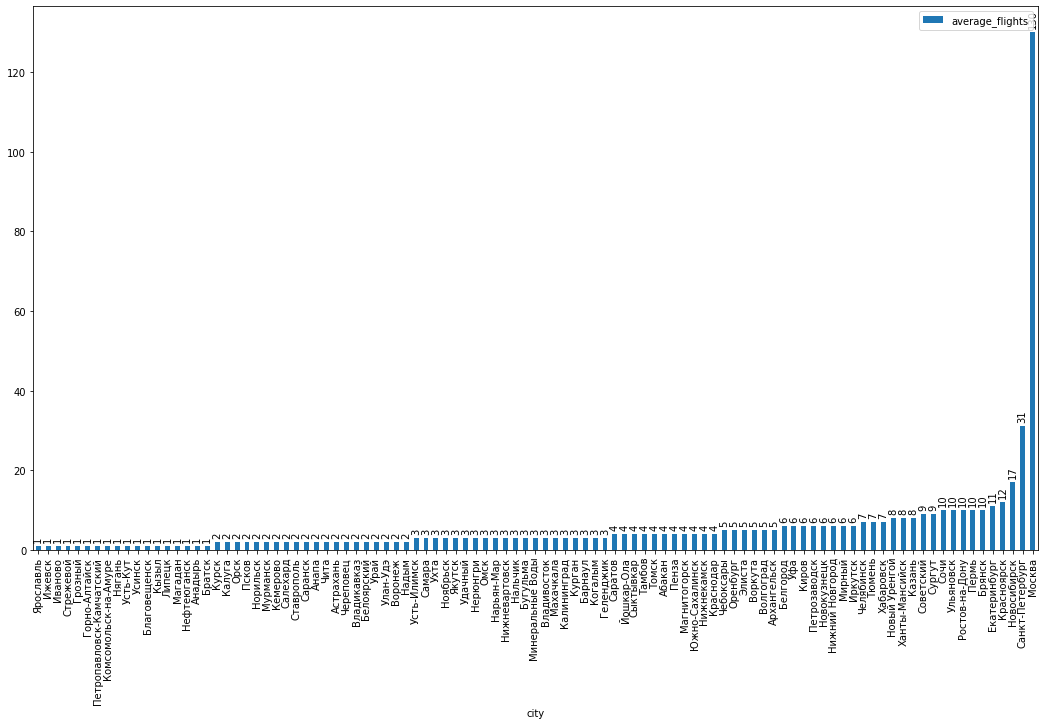

In [12]:
# посмотрим на графике количество полетов по городам
ax = data_city_avgflights.sort_values(by='average_flights',ascending=True).plot(x='city', y='average_flights',kind='bar',figsize=(18, 10))
rects = ax.patches
labels = round(data_city_avgflights.sort_values(by='average_flights',ascending=True)['average_flights'],2)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height +1, label,
            ha='center', va='bottom',rotation='vertical')

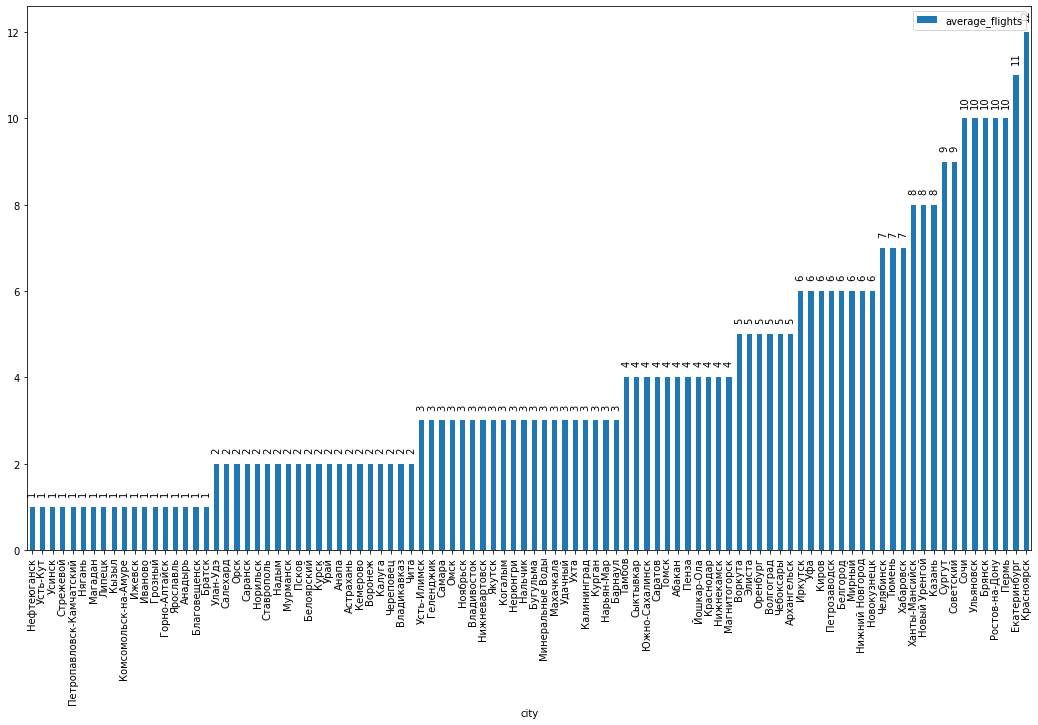

In [13]:
# посмотрим на графике количество полетов по городам без тройки лидеров
ax = data_city_avgflights.query('city != "Москва" & city != "Санкт-Петербург" & city != "Новосибирск"').sort_values(by='average_flights',ascending=True).plot(x='city', y='average_flights',kind='bar',figsize=(18, 10))
rects = ax.patches
labels = round(data_city_avgflights.sort_values(by='average_flights',ascending=True)['average_flights'],2)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height +0.25, label,
            ha='center', va='bottom',rotation='vertical')

In [14]:
#Нашел данные с численностью населения в российских городах на 1 января 2019 года, сделал из них датасет
data_city_popul = pd.read_csv('city_population.csv') 

#объединяем  data_city_avgflights и data_city_popul
data_city_avgflights_popul = data_city_avgflights.merge(data_city_popul, on='city', how='left')

In [15]:
data_city_avgflights_popul.sort_values(by='population',ascending=False)

,city,average_flights,population
43,Москва,130,12615882
70,Санкт-Петербург,31,5383890
54,Новосибирск,17,1618039
20,Екатеринбург,11,1483119
52,Нижний Новгород,6,1253511
...,...,...,...
73,Советский,9,29624
47,Нарьян-Мар,3,24827
7,Белоярский,2,19542
1,Анадырь,1,15849


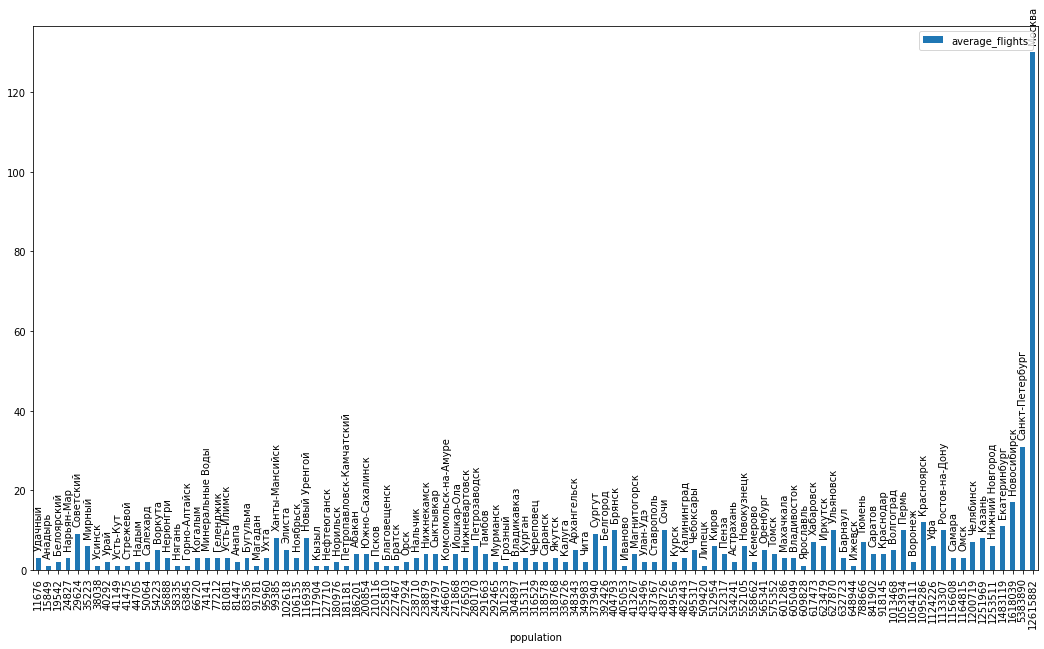

In [16]:
# посмотрим на график с численностью населения и количеством полетов

ax = data_city_avgflights_popul.sort_values(by='population',ascending=True).plot(x='population', y='average_flights',kind='bar',figsize=(18, 10))
rects = ax.patches
labels = data_city_avgflights_popul.sort_values(by='population',ascending=True)['city'] #["label%d" % i for i in xrange(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 2, label,
            ha='center', va='bottom',rotation='vertical')

# Выводы по датасету 2, график 1 <a id='d2v1'></a>

У компании F9 по количеству рейсов явно выбивается Москва, оно и понятно - столица России, центр деловой и культурной жизни.

На втором месте - Санкт-Петербург, наша "вторая столица" - количество рейсов раза в 4 меньше, чем в Москве, но заметно отрывается от остальных городов.

На третьем - Новосибирск, "столица Сибири" - по численности населения он также на третьем месте.

По остальным городам я так и не смог найти, от чего зависит количество рейсов - это явно не связано ни с численностью населения в городе, ни с тем, является ли аэропорт в городе международным, ни с классом аэропорта, ни с количеством аэропортов в городе, ни с удаленностью города от столицы. Т.е., непонятно, почему в Ульяновск или Брянск, вошедшие в десятку лидеров, прибывает в среднем в день больше рейсов, чем в города-миллионники типа Самары или Челябинска. Понятно лишь про Сочи - город-курорт.

Возможно, это связано с деятельностью других авиакомпаний, которые как раз очень плотно работают на тех направлениях, где у F9 мало рейсов, и у нее просто нет шансов пробиться. Было бы интересно посмотреть данные других авиакомпаний.

Визуально по графику со средним количеством рейсов города (за исключением десятки лидеров) можно поделить на следующие равные группы:
- 1 рейса
- 2 рейса
- 3 рейса
- 4-5 рейсов
- 6-9 рейсов


In [17]:
# выбираем топ-10 городов по количеству рейсов
data_10city = data_city_avgflights.sort_values(by='average_flights',ascending=False)[:10]

In [18]:
data_10city

,city,average_flights
43,Москва,130
70,Санкт-Петербург,31
54,Новосибирск,17
33,Красноярск,12
20,Екатеринбург,11
67,Ростов-на-Дону,10
74,Сочи,10
84,Ульяновск,10
63,Пермь,10
10,Брянск,10


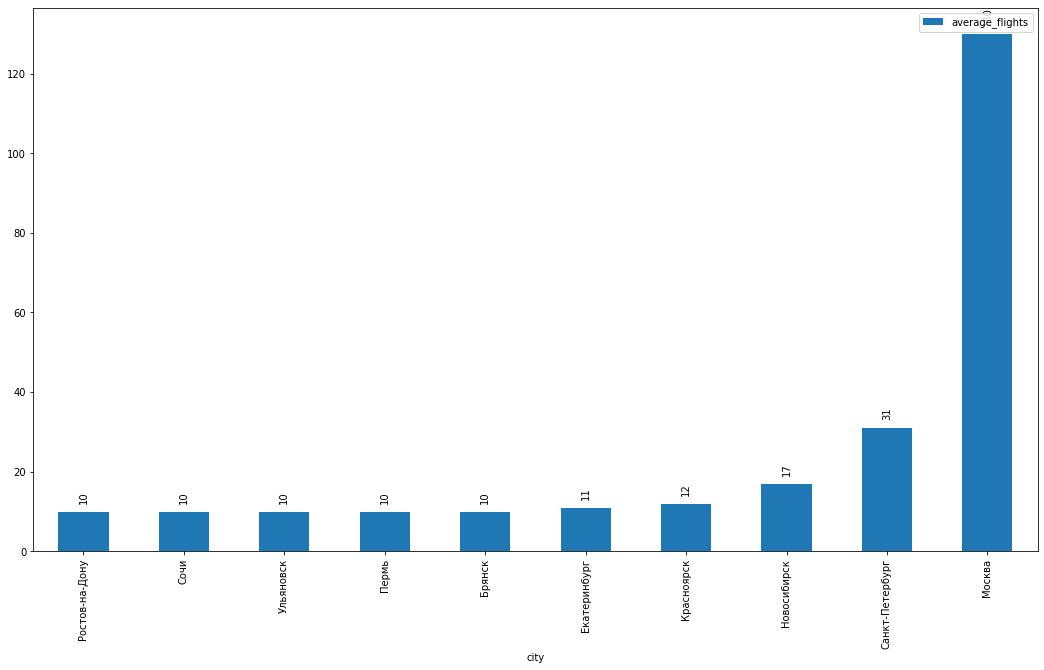

In [19]:
# строим график 3: топ-10 городов и количество рейсов
ax = data_10city.sort_values(by='average_flights',ascending=True).plot(x='city', y='average_flights',kind='bar',figsize=(18, 10))
rects = ax.patches
labels = round(data_10city.sort_values(by='average_flights',ascending=True)['average_flights'],2) 
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 2, label,
            ha='center', va='bottom',rotation='vertical')

## Выводы по датасету 2, график 2 <a id='d2v2'></a>

В десятке лидеров на первом месте с большим отрывом Москва (в среднем 130 рейсов в день), за ней Санкт-Петербург (31), замыкает тройку Новосибирск (17).
Остальные города-участники рейтинга на одном уровне: 10-12 рейсов в день.

# 2. Проверка гипотезы<a id='gipoteza'></a>

Дан набор данных **query_last** с информацией о номере недели, количестве проданных за неделю билетов, есть ли на этой неделе фестиваль и названии фестиваля.
Требуется проверить гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время» и пояснить: как формулировали нулевую и альтернативную гипотезы, какой критерий использовали для проверки гипотез и почему.

In [20]:
#Критический уровень статистической значимости
alpha = 0.05 #5%

In [21]:
data_ticket_festival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [22]:
data_ticket_festival

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [23]:
#festival_week переведем из float в int
data_ticket_festival = data_ticket_festival.astype({'festival_week': 'Int64'})
data_ticket_festival

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [24]:
data_ticket_festival.sort_values(by='ticket_amount',ascending=False)

,week_number,ticket_amount,festival_week,festival_name
2,32,51675,NaN,NaN
7,37,51670,NaN,NaN
9,39,51623,NaN,NaN
8,38,51518,NaN,NaN
4,34,51492,NaN,NaN
6,36,51386,36,Видфест
3,33,51378,NaN,NaN
5,35,51360,NaN,NaN
1,31,51034,31,Пикник Афиши
0,30,43568,30,Park Live


In [25]:
data_ticket_festival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null Int64
festival_name    3 non-null object
dtypes: Int64(1), int64(2), object(1)
memory usage: 458.0+ bytes


In [26]:
#делаем две выборки - продажи билетов во время фестивалей и в обычное время
data_fest = data_ticket_festival.query('festival_name == festival_name')['ticket_amount']#.reset_index(drop = True)
data_nofest = data_ticket_festival.query('festival_name != festival_name')['ticket_amount']#.reset_index(drop = True) 

In [27]:
#Считаем дисперсию
disp_fest = round(np.var(data_fest, ddof=0),2)
disp_nofest = round(np.var(data_nofest, ddof=0),2)

if disp_fest == disp_nofest:
    param_equal_var = True
else:
    param_equal_var = False
    
print("Дисперсия fest/nofest:",disp_fest,"/",disp_nofest,"(equal_var =",param_equal_var,")")


Дисперсия fest/nofest: 12998464.89 / 14694.41 (equal_var = False )


In [29]:
#Проверяем гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».    
#считаем по Манну-Уитни
mw_result = st.mannwhitneyu(
    data_fest, 
    data_nofest)

print('alpha:',alpha)
print('p-value:',mw_result.pvalue)
print()
if (mw_result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время")
else:
    print("Не получилось отвергнуть нулевую гипотезу, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время")
print()    
print("Средний спрос на билеты во время фестивалей/в обычное время:",round(data_fest.mean(),2),"/",round(data_nofest.mean(),2))     

alpha: 0.05
p-value: 0.03412374418900064

Отвергаем нулевую гипотезу, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

Средний спрос на билеты во время фестивалей/в обычное время: 48662.67 / 51530.86


# Выводы по пункту 2  <a id='v2'></a>

Нулевая гипотеза была сформулирована на основании задания: "Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время".

Альтернативная гипотеза:  "Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время".

Пороговое значение alpha задали равное 5%

Для проверки гипотез использовали критерий Манна-Уитни.
Получили p-value = 3% (alpha = 5%). Нулевую теорию опровергаем - средний спрос на билеты во время фестивалей отличается от среднего спроса в обычное время.


Но вообще для таких выводов очень мало данных - во-первых, взят маленький временной промежуток - всего один месяц в 2018 году. Во-вторых, месяц сентябрь выбран неудачно - летом обычно больше проходит фестивалей, чем осенью. А так мы получили лишь 3 фестиваля, 2 из которых в Москве и один в Санкт-Петербурге. Нужно взять временной промежуток шире - чтобы и фестивалей получить больше, и мест их проведения. Нужны данные по билетам, привязанные к рейсам. И хорошо бы посмотреть данные других авиакомпаний, а заодно сравнить стоимость билетов - возможно, посетители фестивалей предпочитают другие авиакомпании, с более удобными и/или дешевыми рейсами. Либо предпочитают добираться до мест проведения фестивалей на машине или поездом.


# 3. Общие выводы <a id='vyvody'></a>

Данные, предоставленные авиакомпанией F9 изучены, выводы по каждому пункту изложены. Гипотезу, что "Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время" после проверки по Ману-Уитни отбросили. Для большей уверенности в выводе требуется больше данных.

